In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  RMSprop
from keras.preprocessing import image
from keras.models import model_from_yaml

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datapath = os.path.join(os.getcwd(),"dataset")
traindata = os.path.join(datapath,"train")
valdata = os.path.join(datapath,"val")

train_with_mask = os.path.join(traindata,"with_mask")
val_with_mask = os.path.join(valdata,"with_mask")
train_without_mask = os.path.join(traindata,"without_mask")
val_without_mask = os.path.join(valdata,"without_mask")


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu',input_shape= (80,80,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [4]:

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [5]:
#callbacks = myCallback()

In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    traindata,
    target_size=(80,80),
    batch_size= 32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    valdata,
    target_size=(80,80),
    batch_size=16,
    class_mode='binary'
)

Found 2996 images belonging to 2 classes.
Found 834 images belonging to 2 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=10,
      verbose=1,
      validation_data = val_generator,
      validation_steps=10
    )

Epoch 1/10
20/20 [==============================] - 267s 13s/step - loss: 0.6897 - acc: 0.5453 - val_loss: 0.6491 - val_acc: 0.6250
Epoch 2/10
20/20 [==============================] - 273s 14s/step - loss: 0.5810 - acc: 0.7375 - val_loss: 0.3601 - val_acc: 0.8687
Epoch 3/10
20/20 [==============================] - 259s 13s/step - loss: 0.4906 - acc: 0.7787 - val_loss: 0.3052 - val_acc: 0.8625
Epoch 4/10
20/20 [==============================] - 264s 13s/step - loss: 0.4356 - acc: 0.8234 - val_loss: 0.2489 - val_acc: 0.9187
Epoch 5/10
20/20 [==============================] - 266s 13s/step - loss: 0.3891 - acc: 0.8422 - val_loss: 0.1834 - val_acc: 0.9438
Epoch 6/10
18/20 [==========================>...] - ETA: 28s - loss: 0.3202 - acc: 0.8819

c:\users\yash patel\appdata\local\programs\python\python35\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 303s 15s/step - loss: 0.3134 - acc: 0.8844 - val_loss: 0.2096 - val_acc: 0.9312
Epoch 7/10
20/20 [==============================] - 287s 14s/step - loss: 0.3541 - acc: 0.8547 - val_loss: 0.2188 - val_acc: 0.9312
Epoch 8/10
20/20 [==============================] - 259s 13s/step - loss: 0.3430 - acc: 0.8678 - val_loss: 0.2034 - val_acc: 0.9438
Epoch 9/10
20/20 [==============================] - 277s 14s/step - loss: 0.3259 - acc: 0.8734 - val_loss: 0.1597 - val_acc: 0.9563
Epoch 10/10
20/20 [==============================] - 284s 14s/step - loss: 0.3453 - acc: 0.8567 - val_loss: 0.2295 - val_acc: 0.9187


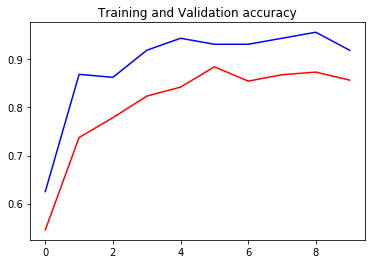

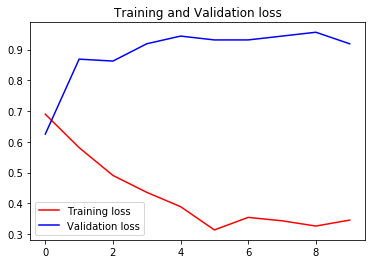

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

In [15]:
path = os.path.join(train_without_mask,"215.jpg")
img = image.load_img(path, target_size=(80,80,3))
xy = image.img_to_array(img)
x = np.expand_dims(xy, axis=0)

im = np.vstack([x])
classes = model.predict(im)
print(classes)

[[1.]]


In [17]:
model.save("trainmodel")

INFO:tensorflow:Assets written to: trainmodel\assets
